In this notebook I will try to reproduce the results from [Nakar and Sari 2012](http://adsabs.harvard.edu/abs/2012ApJ...747...88N). Let's start with equation 1. The equation for the backward relativistic Riemann invariant is 
$\frac{d x}{d t} = \frac{\beta - \beta_s}{1 - \beta \beta_s}$
where $\beta$ is the velocity and $\beta_s$ is the speed of sound. In this limit we are interested in the early times before the fluid element has time to cool, so $\beta_s = 1/\sqrt{3}$. Also, we are interested in the limit $\beta \rightarrow 1$. The velocity profile is therefore given implicitly by

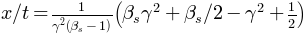

In [21]:
import sympy
sympy.init_printing()

x = sympy.Symbol('x',positive=True)
t = sympy.Symbol('t',positive=True)
beta = sympy.Symbol('beta',positive=True)
beta_s = sympy.Symbol('beta_s',positive=True)
gamma = sympy.Symbol('gamma',positive=True)
rhs = (beta-beta_s)/(1-beta*beta_s)
rhs = rhs.subs(beta,sympy.sqrt(1-1/gamma**2))
rhs = sympy.series(rhs,x=gamma,x0=sympy.oo,n=3).removeO()
eqn = sympy.Eq(x/t,rhs.simplify())
eqn

solving for $\gamma$

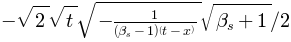

In [26]:
gamma_profile = sympy.solve(eqn,gamma)[0]
gamma_profile

Now let us follow a fluid element. The equation of motion is

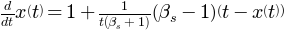

In [37]:
rhs = sympy.sqrt(1-1/gamma**2)
rhs = sympy.series(rhs,x=gamma,x0=sympy.oo,n=3).removeO()
rhs = rhs.subs(gamma, gamma_profile)
eqn_motion = sympy.Eq(x(t).diff(t),rhs.subs(x,x(t)))
eqn_motion

solving the equation

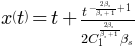

In [51]:
raw_sol = sympy.dsolve(eqn_motion,x(t), hint="1st_homogeneous_coeff_best")
raw_sol

The lorentz factor of a single fluid element evolves like

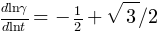

In [68]:
temp = raw_sol.rhs
temp = temp.diff(t)
temp = 1/sympy.sqrt(temp-1)
temp = sympy.expand_power_base(temp)
temp = temp.simplify()
temp = temp.subs(beta_s,1/sympy.sqrt(3))
temp = (sympy.log(temp).diff(t)*t).simplify()
sympy.Eq(sympy.Symbol(r'\frac{d \ln \gamma}{d \ln t}'), temp)